In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Set styling
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Load all data
customers = pd.read_csv('../data/raw/olist_customers_dataset.csv')
orders = pd.read_csv('../data/raw/olist_orders_dataset.csv')
order_items = pd.read_csv('../data/raw/olist_order_items_dataset.csv')
rfm = pd.read_csv('../data/processed/customer_rfm_with_predictions.csv', index_col=0)

orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

print("✅ All data loaded successfully!")
print(f"📊 Total Customers: {len(customers):,}")
print(f"📦 Total Orders: {len(orders):,}")

✅ All data loaded successfully!
📊 Total Customers: 99,441
📦 Total Orders: 99,441


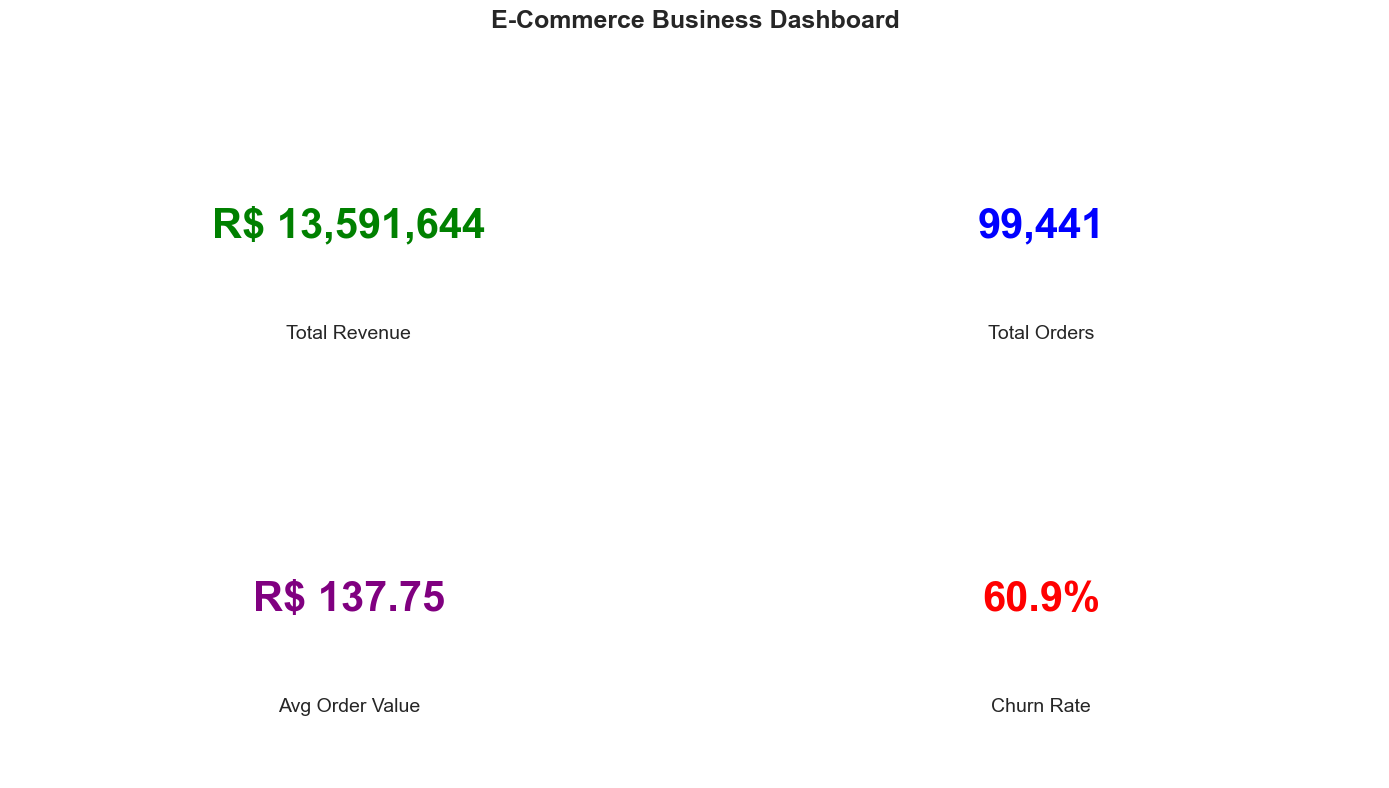

In [4]:
# Calculate KPIs (Key Performance Indicators)
orders_with_items = orders.merge(order_items, on='order_id')
total_revenue = orders_with_items['price'].sum()
avg_order_value = orders_with_items.groupby('order_id')['price'].sum().mean()
total_orders = len(orders)
churn_rate = rfm['churned'].mean() * 100

# Create a figure with KPIs
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
fig.suptitle('E-Commerce Business Dashboard', fontsize=18, fontweight='bold')

# KPI 1: Total Revenue
axes[0, 0].text(0.5, 0.5, f'R$ {total_revenue:,.0f}', 
                ha='center', va='center', fontsize=30, fontweight='bold', color='green')
axes[0, 0].text(0.5, 0.2, 'Total Revenue', 
                ha='center', va='center', fontsize=14)
axes[0, 0].axis('off')

# KPI 2: Total Orders
axes[0, 1].text(0.5, 0.5, f'{total_orders:,}', 
                ha='center', va='center', fontsize=30, fontweight='bold', color='blue')
axes[0, 1].text(0.5, 0.2, 'Total Orders', 
                ha='center', va='center', fontsize=14)
axes[0, 1].axis('off')

# KPI 3: Avg Order Value
axes[1, 0].text(0.5, 0.5, f'R$ {avg_order_value:.2f}', 
                ha='center', va='center', fontsize=30, fontweight='bold', color='purple')
axes[1, 0].text(0.5, 0.2, 'Avg Order Value', 
                ha='center', va='center', fontsize=14)
axes[1, 0].axis('off')

# KPI 4: Churn Rate
axes[1, 1].text(0.5, 0.5, f'{churn_rate:.1f}%', 
                ha='center', va='center', fontsize=30, fontweight='bold', color='red')
axes[1, 1].text(0.5, 0.2, 'Churn Rate', 
                ha='center', va='center', fontsize=14)
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

In [5]:
# Interactive revenue trend
monthly_revenue = orders_with_items.groupby(
    orders_with_items['order_purchase_timestamp'].dt.to_period('M')
)['price'].sum().reset_index()
monthly_revenue['order_purchase_timestamp'] = monthly_revenue['order_purchase_timestamp'].astype(str)

fig = px.line(monthly_revenue, 
              x='order_purchase_timestamp', 
              y='price',
              title='Monthly Revenue Trend',
              labels={'price': 'Revenue (BRL)', 'order_purchase_timestamp': 'Month'})
fig.update_traces(line_color='#1f77b4', line_width=3)
fig.update_layout(hovermode='x unified')
fig.show()

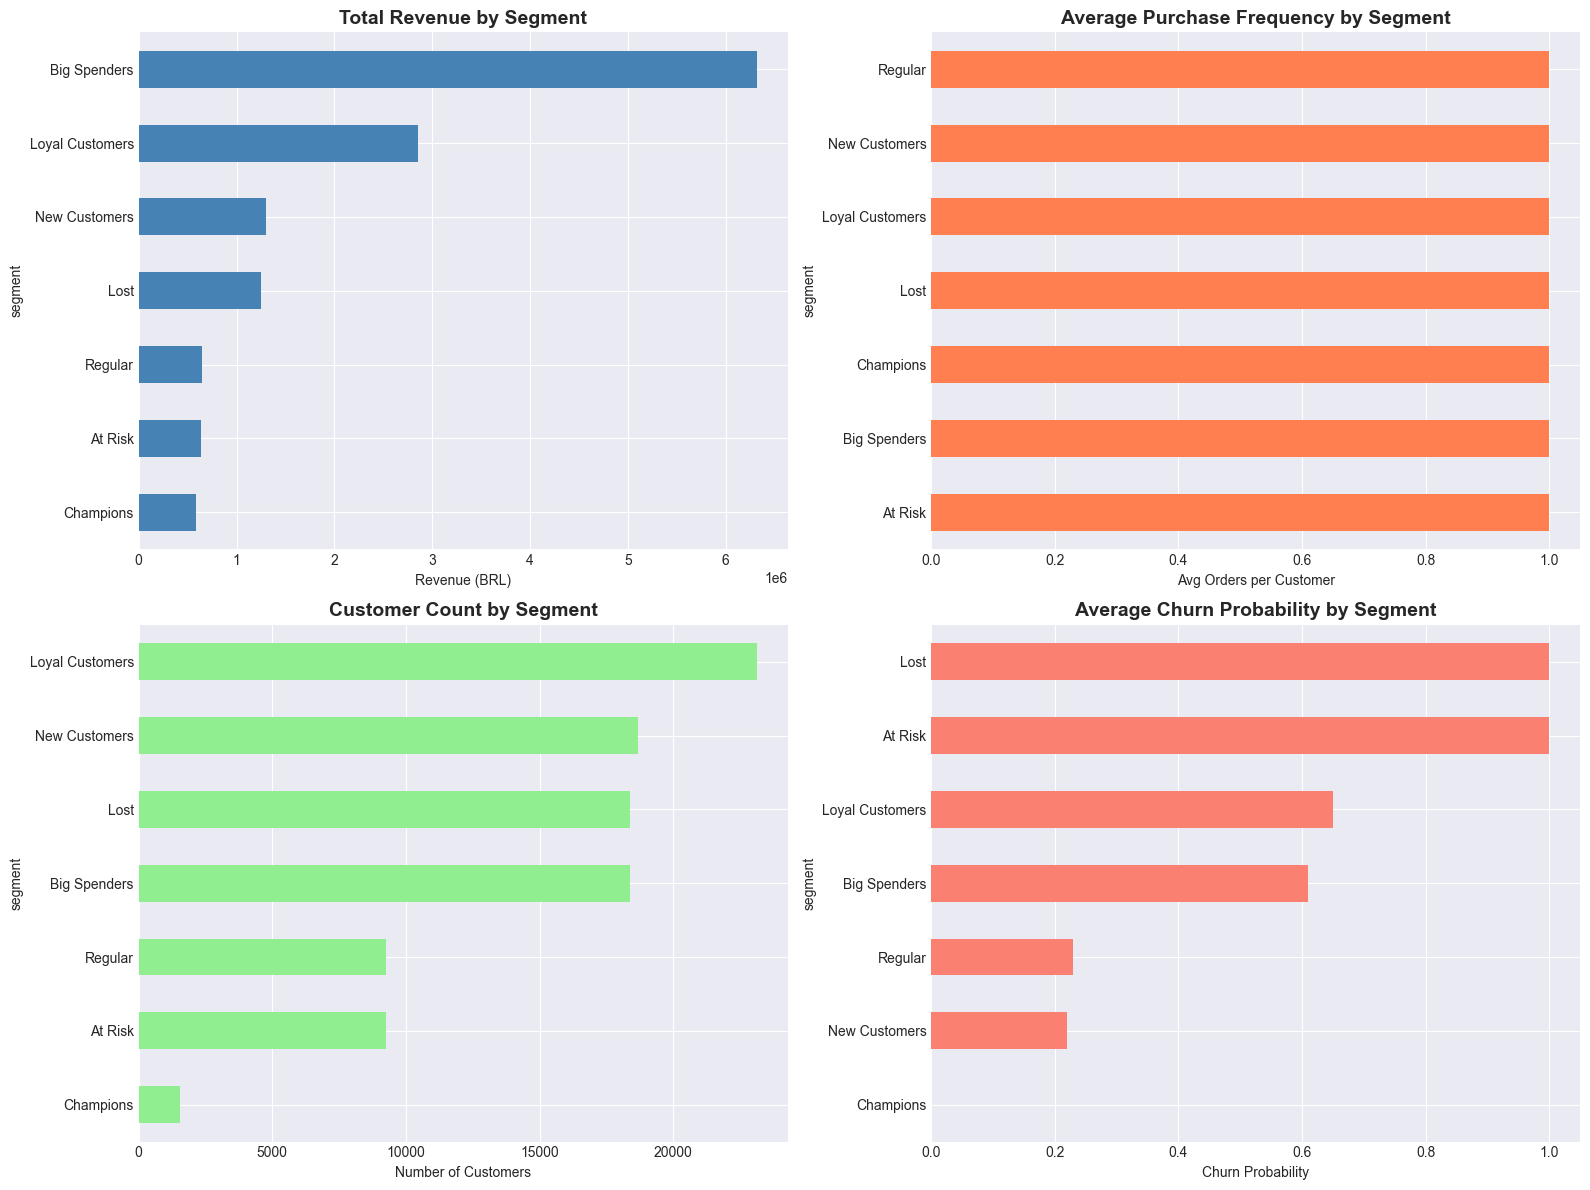


Segment Summary:
                   monetary  frequency  recency  churn_probability  count
segment                                                                  
At Risk           635367.36        1.0   373.27               1.00   9257
Big Spenders     6316016.23        1.0   246.35               0.61  18393
Champions         581342.57        1.0    63.77               0.00   1553
Lost             1255407.84        1.0   371.14               1.00  18395
Loyal Customers  2853106.55        1.0   257.00               0.65  23114
New Customers    1302345.21        1.0   117.99               0.22  18688
Regular           648057.94        1.0   118.40               0.23   9266


In [6]:
# Segment comparison
segment_summary = rfm.groupby('segment').agg({
    'monetary': 'sum',
    'frequency': 'mean',
    'recency': 'mean',
    'churn_probability': 'mean'
}).round(2)

segment_summary['count'] = rfm.groupby('segment').size()

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Revenue by segment
segment_summary.sort_values('monetary', ascending=True).plot(
    kind='barh', y='monetary', ax=axes[0, 0], color='steelblue', legend=False
)
axes[0, 0].set_title('Total Revenue by Segment', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Revenue (BRL)')

# 2. Average frequency by segment
segment_summary.sort_values('frequency', ascending=True).plot(
    kind='barh', y='frequency', ax=axes[0, 1], color='coral', legend=False
)
axes[0, 1].set_title('Average Purchase Frequency by Segment', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Avg Orders per Customer')

# 3. Customer count by segment
segment_summary.sort_values('count', ascending=True).plot(
    kind='barh', y='count', ax=axes[1, 0], color='lightgreen', legend=False
)
axes[1, 0].set_title('Customer Count by Segment', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Number of Customers')

# 4. Churn risk by segment
segment_summary.sort_values('churn_probability', ascending=True).plot(
    kind='barh', y='churn_probability', ax=axes[1, 1], color='salmon', legend=False
)
axes[1, 1].set_title('Average Churn Probability by Segment', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Churn Probability')

plt.tight_layout()
plt.show()

print("\nSegment Summary:")
print(segment_summary)